___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [46]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline
    
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [47]:
# CODE HERE

df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [2]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

<AxesSubplot:xlabel='DATE'>

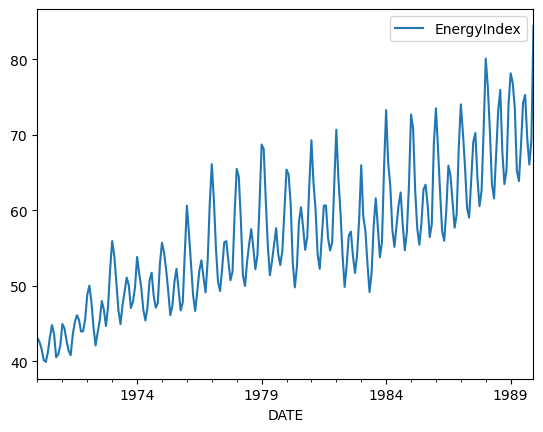

In [48]:
# CODE HERE
df.plot()

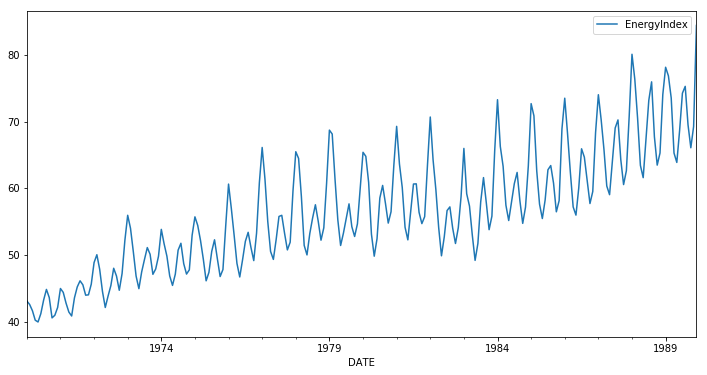

In [3]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

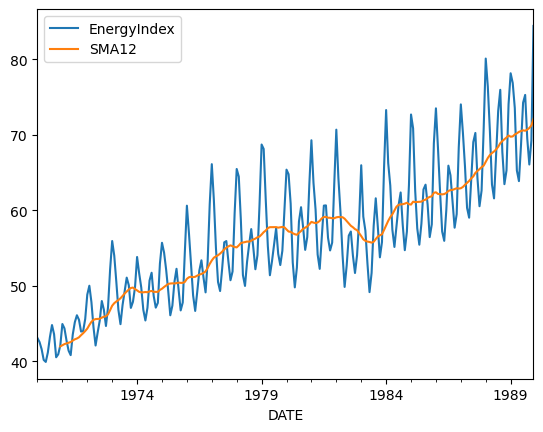

In [49]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot();


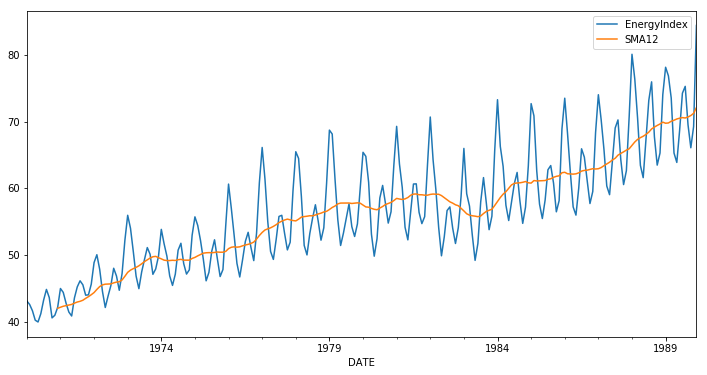

In [4]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

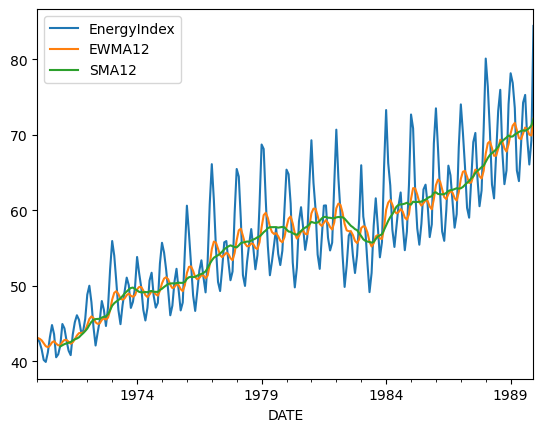

In [51]:
 
df['EWMA12'] = df['EnergyIndex'].ewm(span=12,adjust=False).mean()
df[['EnergyIndex','EWMA12','SMA12']].plot();

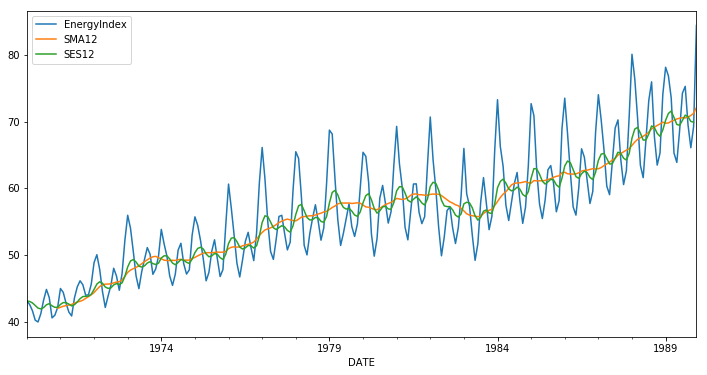

In [5]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

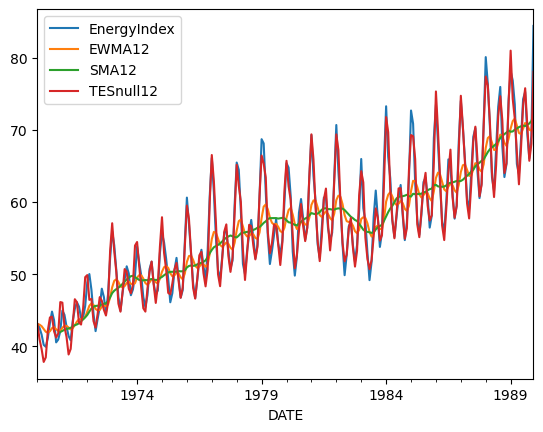

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
 
model = ExponentialSmoothing(df['EnergyIndex'], seasonal='multiplicative', seasonal_periods=12).fit()
df['TESnull12'] = model.fittedvalues

df[['EnergyIndex','EWMA12','SMA12','TESnull12']].plot();

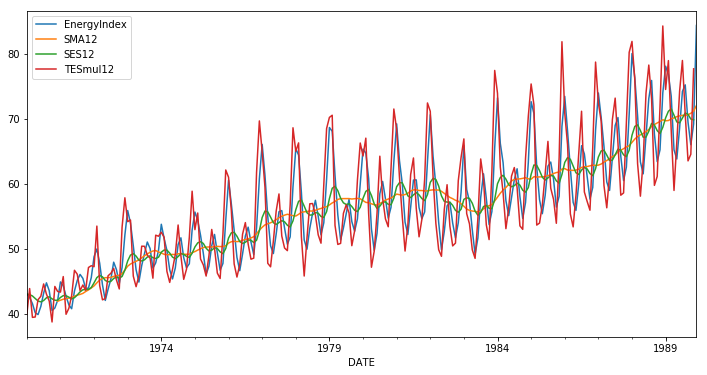

In [6]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

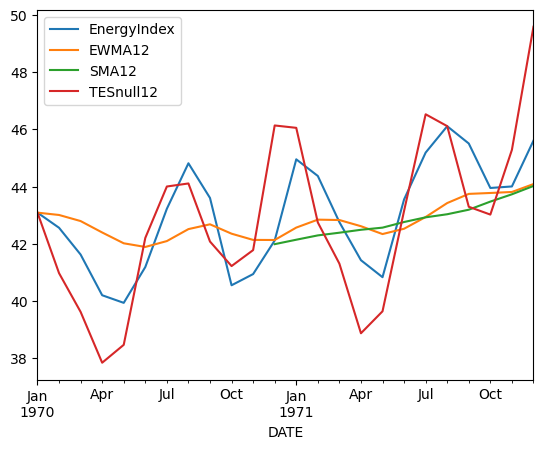

In [53]:
 
df_filtered = df.loc['1970-01-01':'1971-12-31']

df_filtered[['EnergyIndex','EWMA12','SMA12','TESnull12']].plot();
 

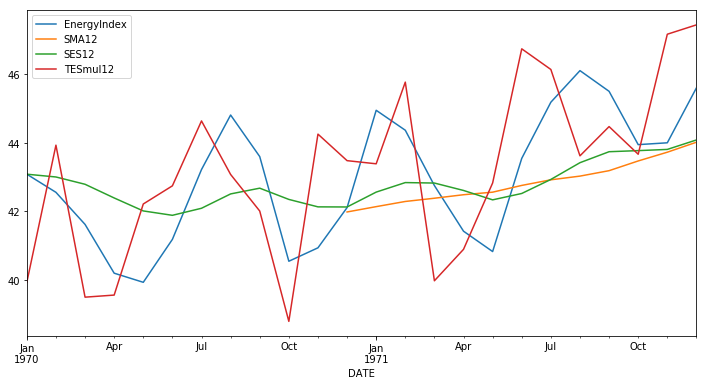

In [7]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

## Sự suy giảm chỉ số Sản Xuất Công Nghiệp (Industrial Production Index) xung quanh năm 1982-1983 có thể liên quan đến một số yếu tố kinh tế và lịch sử quan trọng vào thời điểm đó. Dưới đây là một số lý do có thể giải thích:


1. Khủng hoảng kinh tế toàn cầu: Đầu những năm 1980, nền kinh tế toàn cầu trải qua một cuộc suy thoái lớn. Các cuộc khủng hoảng dầu mỏ vào những năm 1970 đã gây ra cú sốc giá năng lượng, dẫn đến lạm phát cao và suy giảm hoạt động sản xuất công nghiệp vào đầu những năm 1980.


2. Chính sách thắt chặt tiền tệ: Ở Mỹ, Cục Dự trữ Liên bang đã tăng lãi suất mạnh mẽ trong giai đoạn này để kiềm chế lạm phát, nhưng điều này cũng làm tăng chi phí vay vốn, làm giảm đầu tư và tiêu dùng. Điều này có thể dẫn đến suy giảm trong sản xuất công nghiệp.


3. Thị trường lao động và thất nghiệp: Tỷ lệ thất nghiệp cũng tăng mạnh vào đầu những năm 1980, khiến sức mua của người tiêu dùng giảm. Điều này ảnh hưởng trực tiếp đến sản xuất và tiêu thụ hàng hóa.


4. Thay đổi công nghệ và tái cấu trúc ngành: Nhiều ngành công nghiệp truyền thống trong giai đoạn này đã bắt đầu phải đối mặt với sự cạnh tranh từ các công nghệ mới, đồng thời các quốc gia khác đã phát triển năng lực sản xuất của họ, dẫn đến suy giảm trong một số lĩnh vực công nghiệp ở các nước phát triển.

## Great job!